About this data

longitude: A measure of how far west a house is; a higher value is farther west

latitude: A measure of how far north a house is; a higher value is farther north

housingMedianAge: Median age of a house within a block; a lower number is a newer building

totalRooms: Total number of rooms within a block

totalBedrooms: Total number of bedrooms within a block

population: Total number of people residing within a block

households: Total number of households, a group of people residing within a home unit, for a block

medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

medianHouseValue: Median house value for households within a block (measured in US Dollars)

oceanProximity: Location of the house with respect to the sea/bay area

In [1]:
# Do this on Windows machines before importing KMeans to avoid a known bug (memory leak). 
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [3]:
# Data loading
file_path = Path("housing.csv")
cal_housing_df = pd.read_csv(file_path)
cal_housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
# List dataframe data types
cal_housing_df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [5]:
cal_housing_df.duplicated().unique

<bound method Series.unique of 0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool>

In [6]:
cal_housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
cal_housing_df.shape

(20640, 10)

In [8]:
# Find null values
for column in cal_housing_df.columns:
    print(f"Column {column} has {cal_housing_df[column].isnull().sum()} null values")

Column longitude has 0 null values
Column latitude has 0 null values
Column housing_median_age has 0 null values
Column total_rooms has 0 null values
Column total_bedrooms has 207 null values
Column population has 0 null values
Column households has 0 null values
Column median_income has 0 null values
Column median_house_value has 0 null values
Column ocean_proximity has 0 null values


In [9]:
#dropping rows with na values
cal_housing_df = cal_housing_df[cal_housing_df['total_bedrooms'].notna()]
cal_housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [10]:
cal_housing_df = cal_housing_df.reset_index(drop=True)
cal_housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Data preprocessing for Logistics Regression

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

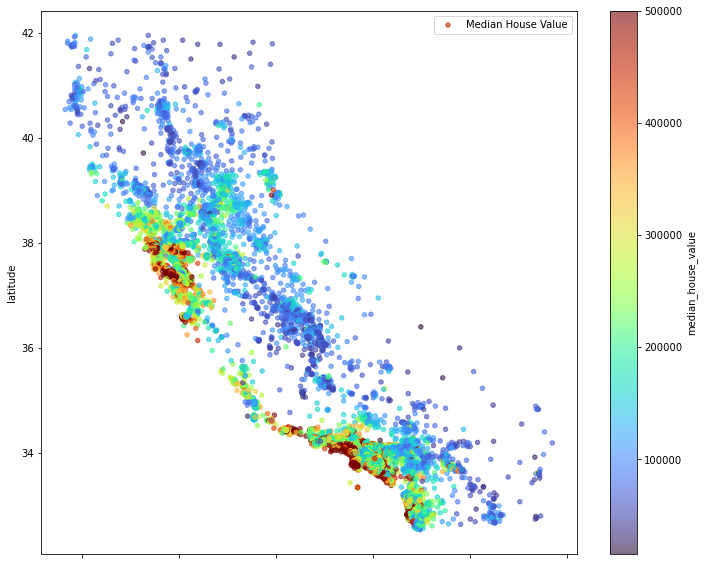

In [11]:
#Houses with high median values tend to be clustered by the shore/bay/ sea. we can perhaps do a logistic regression as well.

cal_housing_df.plot(kind="scatter",x="longitude",y="latitude",alpha=0.6,
                    label="Median House Value",figsize=(12,10)
            ,c="median_house_value",cmap=plt.get_cmap("turbo"),colorbar=True)
# plt.savefig("Images/LongitudevLatitude.png")

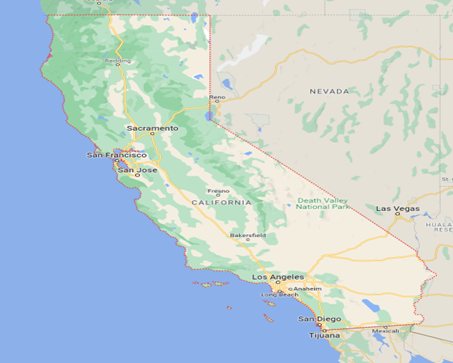

In [12]:
#Creating new columns and reengineering the dataset
cal_housing_df['rooms_per_household'] = cal_housing_df['total_rooms'] / cal_housing_df['households']
cal_housing_df['bedrooms_per_household'] = cal_housing_df['total_bedrooms'] / cal_housing_df['households']
# cal_housing_df['bedrooms_per_room'] = cal_housing_df['total_bedrooms'] / cal_housing_df['total_rooms']
cal_housing_df['population_per_household'] = cal_housing_df['population'] / cal_housing_df['households']

cal_housing_df = cal_housing_df.drop(columns=['total_bedrooms','total_rooms', 'households'])

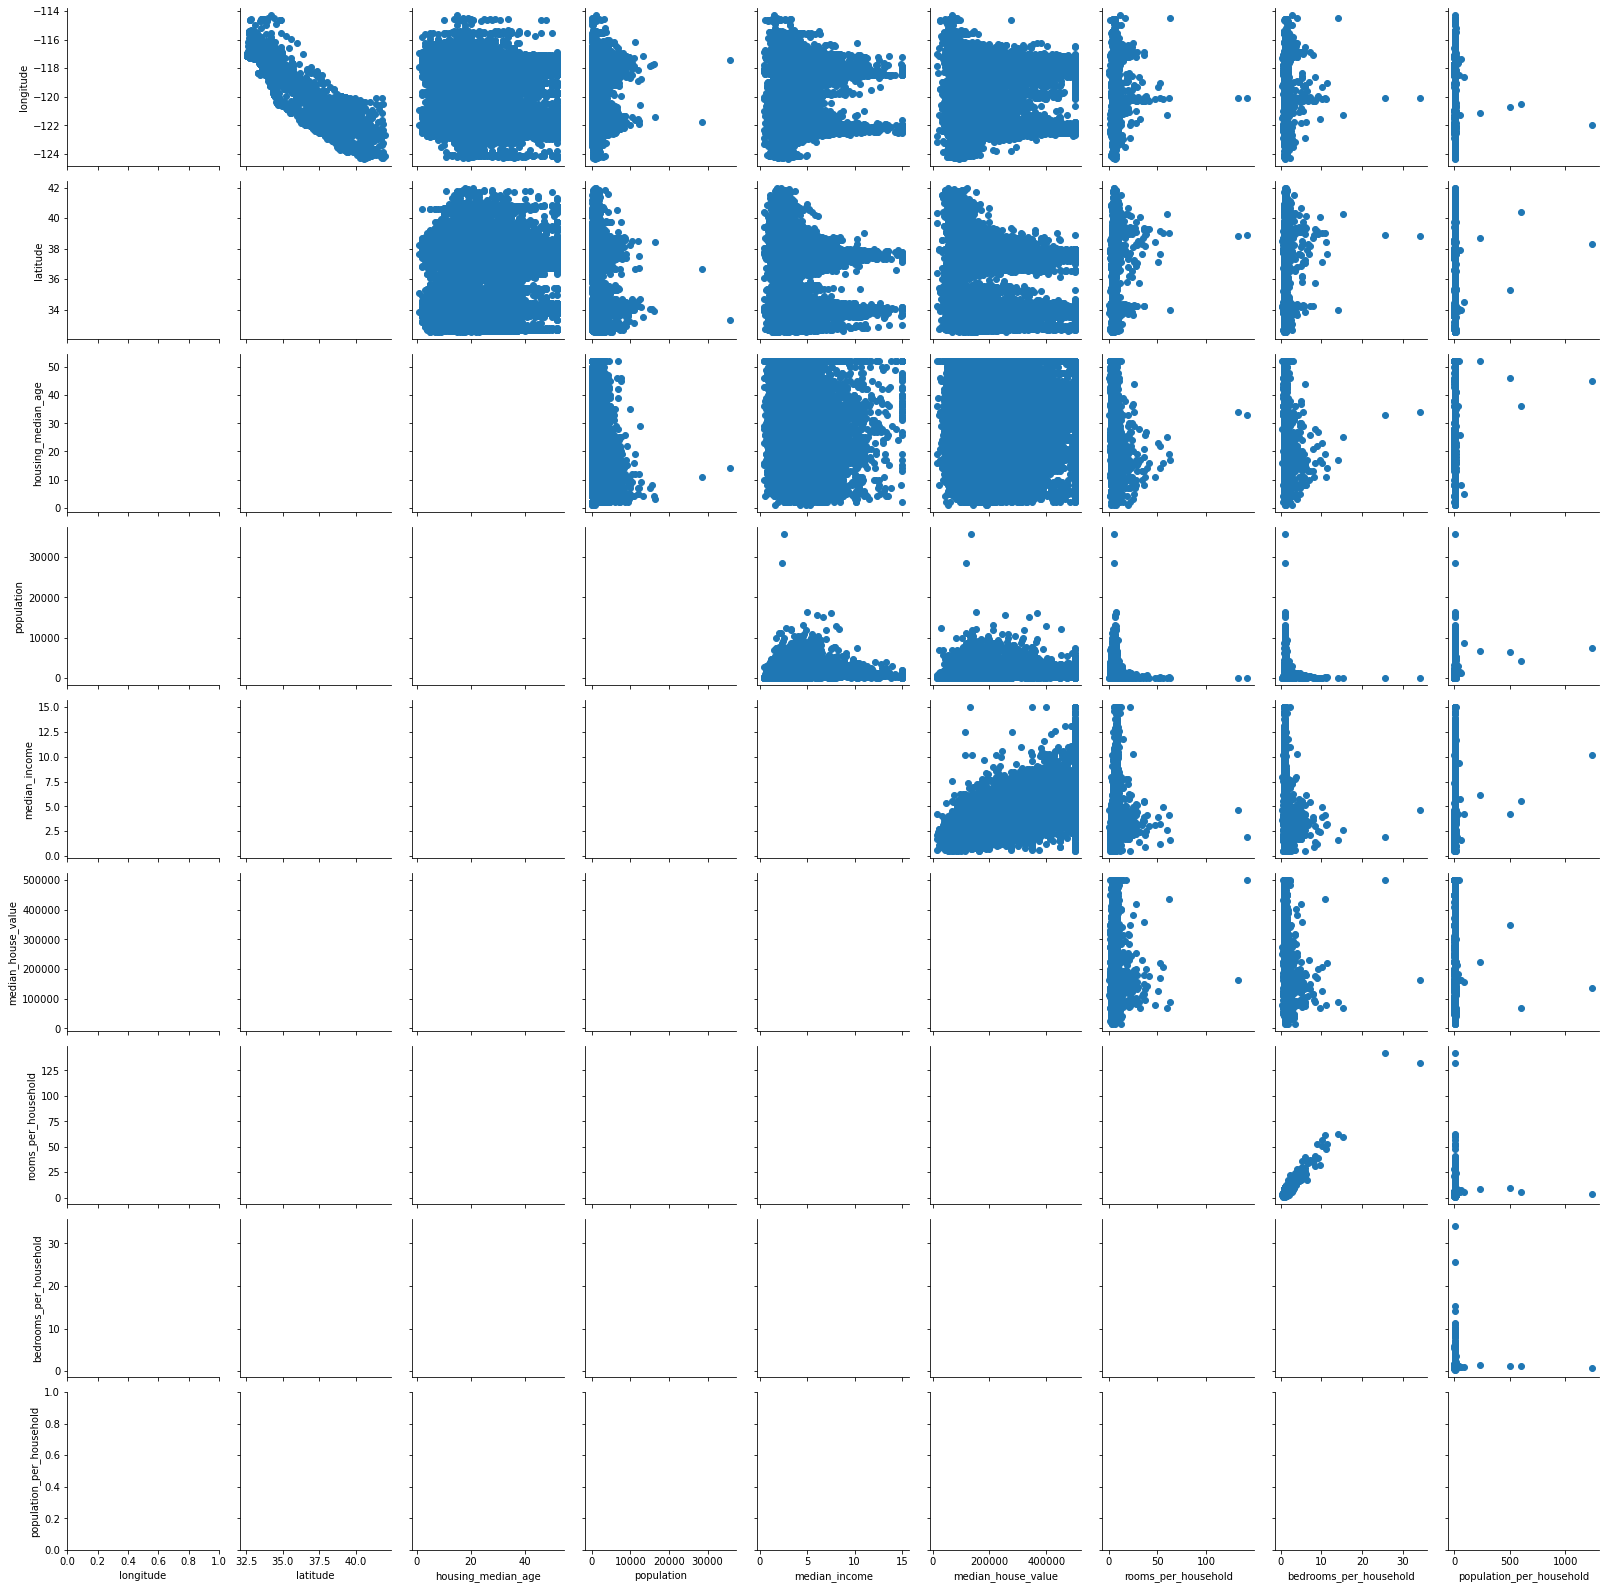

In [13]:
# Correlation Matrix to make all scatter plots at once

# importing seaborn package
import seaborn

# Create a grid of column pairs with scatter plots for non-diagonal(upper portion)
seaborn.PairGrid(cal_housing_df).map_upper(plt.scatter)
# plt.savefig("Images/Seaborn.png")

## Significance of checking correlationship between input features.
A collinearity is a special case when two or more variables are highly correlated.

when input features in the regression model are highly correlated to each other. It makes it hard to interpret of model and also creates an overfitting problem.

This means the regression coefficients are not uniquely determined. In turn it hurts the interpretability of the model as then the regression coefficients are not unique and have influences from other features. 
to have a more interpretable model, rule of thumb is that we should avoid features that have a very high (~R² > .8) being contained in the features.

We noticed that the following features are highly correlated with each other: 'population', 'bedrooms_per_household', and 'population_per_household' are highly correlated. 
One can assume population for each block is certainly proportional to the households numbers. In addition, total rooms can certainly be proportional to the number of bedrooms. Thus, a high correlation should be expected.

This implies a multicollinearity and takes away from our ability to interpret the beta coefficients from both.
We would need to either drop some of these variables or find a way to make them less correlated. This is where PCA comes in to reduce the dimensions and noises that may contain collinear input variables.

In [14]:
cal_housing_df.corr()

,longitude,latitude,housing_median_age,population,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household
longitude,1.000000,-0.924616,-0.109357,0.100270,-0.015550,-0.045398,-0.027307,0.013402,0.002304
latitude,-0.924616,1.000000,0.011899,-0.108997,-0.079626,-0.144638,0.106423,0.070025,0.002522
housing_median_age,-0.109357,0.011899,1.000000,-0.295787,-0.118278,0.106432,-0.153031,-0.077918,0.013258
population,0.100270,-0.108997,-0.295787,1.000000,0.005087,-0.025300,-0.071898,-0.066510,0.070062
median_income,-0.015550,-0.079626,-0.118278,0.005087,1.000000,0.688355,0.325307,-0.062299,0.018894
median_house_value,-0.045398,-0.144638,0.106432,-0.025300,0.688355,1.000000,0.151344,-0.046739,-0.023639
rooms_per_household,-0.027307,0.106423,-0.153031,-0.071898,0.325307,0.151344,1.000000,0.848616,-0.004873
bedrooms_per_household,0.013402,0.070025,-0.077918,-0.066510,-0.062299,-0.046739,0.848616,1.000000,-0.006179
population_per_household,0.002304,0.002522,0.013258,0.070062,0.018894,-0.023639,-0.004873,-0.006179,1.000000


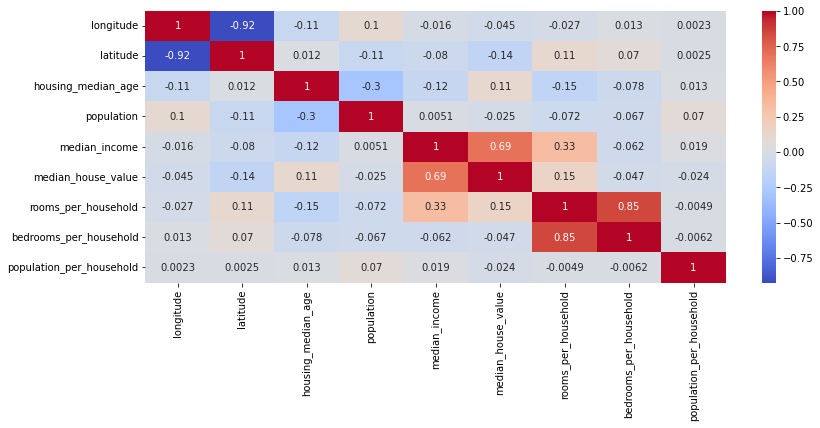

In [15]:
#Correlation matrix
# rule of thumb is that we should avoid features that have a very high (~R² > .8)
import seaborn

cal_housing_df.corr()
plt.figure(figsize=(13,5))
heat_map = seaborn.heatmap(cal_housing_df.corr(), annot=True, cmap="coolwarm")
plt.show()
# plt.savefig("Images/heatmapofcorrelation.png")

In [16]:
cal_housing_df.head()

,longitude,latitude,housing_median_age,population,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
0,-122.23,37.88,41.0,322.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,2401.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,496.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,558.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,565.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467


C:\Users\Sung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='median_house_value'>

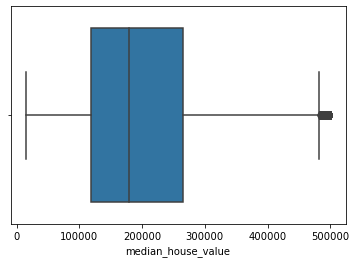

In [17]:
#please show how the house value is cut off at 500,000. perhaps the dataset was selected form a range of 0-500,000 house values.
seaborn.boxplot(cal_housing_df['median_house_value'])
# plt.savefig("Images/medianhousevalue.png")

In [18]:
# confirming no null values
for column in cal_housing_df.columns:
    print(f"Column {column} has {cal_housing_df[column].isnull().sum()} null values")

Column longitude has 0 null values
Column latitude has 0 null values
Column housing_median_age has 0 null values
Column population has 0 null values
Column median_income has 0 null values
Column median_house_value has 0 null values
Column ocean_proximity has 0 null values
Column rooms_per_household has 0 null values
Column bedrooms_per_household has 0 null values
Column population_per_household has 0 null values


In [19]:
# Transform Channel
def changeMedianhousevalue(house):
    if house > 400000:
        return 0
    elif house >= 250000 and house <= 400000:
        return 1
    else:
        return 2

# encoding median house value into numbers
cal_housing_df["median_house_value"] = cal_housing_df["median_house_value"].apply(changeMedianhousevalue)
cal_housing_df

,longitude,latitude,housing_median_age,population,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
0,-122.23,37.88,41.0,322.0,8.3252,0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,2401.0,8.3014,1,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,496.0,7.2574,1,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,558.0,5.6431,1,NEAR BAY,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,565.0,3.8462,1,NEAR BAY,6.281853,1.081081,2.181467
...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,845.0,1.5603,2,INLAND,5.045455,1.133333,2.560606
20429,-121.21,39.49,18.0,356.0,2.5568,2,INLAND,6.114035,1.315789,3.122807
20430,-121.22,39.43,17.0,1007.0,1.7000,2,INLAND,5.205543,1.120092,2.325635
20431,-121.32,39.43,18.0,741.0,1.8672,2,INLAND,5.329513,1.171920,2.123209


In [20]:
#encoding ocean_proximity and dividing it into attributes with an object value to 0, 1 values
cal_housing_df = pd.get_dummies(cal_housing_df, prefix=None)
cal_housing_df

,longitude,latitude,housing_median_age,population,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,322.0,8.3252,0,6.984127,1.023810,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,2401.0,8.3014,1,6.238137,0.971880,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,496.0,7.2574,1,8.288136,1.073446,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,558.0,5.6431,1,5.817352,1.073059,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,565.0,3.8462,1,6.281853,1.081081,2.181467,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,845.0,1.5603,2,5.045455,1.133333,2.560606,0,1,0,0,0
20429,-121.21,39.49,18.0,356.0,2.5568,2,6.114035,1.315789,3.122807,0,1,0,0,0
20430,-121.22,39.43,17.0,1007.0,1.7000,2,5.205543,1.120092,2.325635,0,1,0,0,0
20431,-121.32,39.43,18.0,741.0,1.8672,2,5.329513,1.171920,2.123209,0,1,0,0,0


In [21]:
cal_housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'population',
       'median_income', 'median_house_value', 'rooms_per_household',
       'bedrooms_per_household', 'population_per_household',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [22]:
# List dataframe data types
cal_housing_df.dtypes

longitude                     float64
latitude                      float64
housing_median_age            float64
population                    float64
median_income                 float64
median_house_value              int64
rooms_per_household           float64
bedrooms_per_household        float64
population_per_household      float64
ocean_proximity_<1H OCEAN       uint8
ocean_proximity_INLAND          uint8
ocean_proximity_ISLAND          uint8
ocean_proximity_NEAR BAY        uint8
ocean_proximity_NEAR OCEAN      uint8
dtype: object

# Logistics regression

In [23]:
#Collinearity issue showcase.
# Define the X (features) and y (target) sets.
y = cal_housing_df["median_house_value"].values
X = cal_housing_df.drop(columns=['median_house_value']).values
# X = cal_housing_df.drop(['median_house_value','total_bedrooms','total_rooms', 'households'], axis=1).values
target_names = ["Median House value greater than $400,000", "Median House value between $250,000 and $400,000", 
                "Median House value less than $250,000"]

In [24]:
X

array([[-122.23,   37.88,   41.  , ...,    0.  ,    1.  ,    0.  ],
       [-122.22,   37.86,   21.  , ...,    0.  ,    1.  ,    0.  ],
       [-122.24,   37.85,   52.  , ...,    0.  ,    1.  ,    0.  ],
       ...,
       [-121.22,   39.43,   17.  , ...,    0.  ,    0.  ,    0.  ],
       [-121.32,   39.43,   18.  , ...,    0.  ,    0.  ,    0.  ],
       [-121.24,   39.37,   16.  , ...,    0.  ,    0.  ,    0.  ]])

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.35)

In [26]:
#Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled

array([[ 0.71509311, -0.83510419,  0.2692118 , ..., -0.01227248,
        -0.35561651, -0.38481283],
       [-0.62317459,  0.99588589, -0.68382632, ..., -0.01227248,
        -0.35561651, -0.38481283],
       [ 0.5902547 , -0.69930185,  0.98399039, ..., -0.01227248,
        -0.35561651, -0.38481283],
       ...,
       [ 0.56528702, -0.73208173,  1.85760866, ..., -0.01227248,
        -0.35561651, -0.38481283],
       [ 1.30433038, -0.79764147,  0.03095227, ..., -0.01227248,
        -0.35561651, -0.38481283],
       [-1.30728905,  1.00525157,  0.50747133, ..., -0.01227248,
         2.8120179 , -0.38481283]])

In [28]:
# # Create a DataFrame with the transformed data
# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns[:13])
# X_train_scaled_df

In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
y_true = y_test
y_pred = classifier.predict(X_test)
# this one matches with the slide picture
cm = confusion_matrix(y_true, y_pred, labels=[1,0])
cm

array([[602,  90],
       [165, 342]], dtype=int64)

In [31]:
# Train a Logistic Regression model print the model score
print(classification_report(y_test, y_pred, target_names=target_names))
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

                                                  precision    recall  f1-score   support

        Median House value greater than $400,000       0.78      0.53      0.63       650
Median House value between $250,000 and $400,000       0.60      0.44      0.51      1377
           Median House value less than $250,000       0.85      0.95      0.90      5125

                                        accuracy                           0.81      7152
                                       macro avg       0.74      0.64      0.68      7152
                                    weighted avg       0.80      0.81      0.80      7152

Training Data Score: 0.8091258188389429
Testing Data Score: 0.8145973154362416


## Our Testing Score is really good to begin with.
### Out of all the predictions made True for Median house value falling in each of the price range as shown above, our model had an precision of 78% predicting the median house value greater than $400,000.

### 60% precision was seen predicting a median house value between $250,000-400,000.

### 85% precision was seen predicting a median house value of less than $250,000

In [32]:
# Train a Logistic Regression model print the model score. why is it giving such a low accuracy with scaled dataset?

print(classification_report(y_test, y_pred, target_names=target_names))
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

                                                  precision    recall  f1-score   support

        Median House value greater than $400,000       0.78      0.53      0.63       650
Median House value between $250,000 and $400,000       0.60      0.44      0.51      1377
           Median House value less than $250,000       0.85      0.95      0.90      5125

                                        accuracy                           0.81      7152
                                       macro avg       0.74      0.64      0.68      7152
                                    weighted avg       0.80      0.81      0.80      7152

Training Data Score: 0.4774489872750546
Testing Data Score: 0.47818791946308725


## K-nearest neighbor

k: 1, Train/Test Score: 1.000/0.775
k: 3, Train/Test Score: 0.889/0.801
k: 5, Train/Test Score: 0.864/0.806
k: 7, Train/Test Score: 0.854/0.811
k: 9, Train/Test Score: 0.846/0.817
k: 11, Train/Test Score: 0.840/0.818
k: 13, Train/Test Score: 0.839/0.816
k: 15, Train/Test Score: 0.836/0.818
k: 17, Train/Test Score: 0.832/0.818
k: 19, Train/Test Score: 0.831/0.818


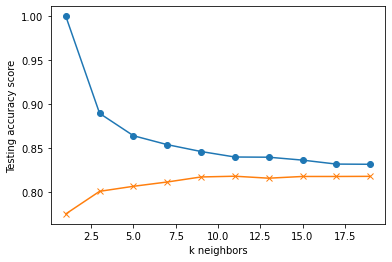

In [33]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

#test accuracy starts to stabilize. plateau. another indication of not overfitting your model? performance of test score improved and
#started to plateau starting at k of 11

In [34]:
# Note that k: 11 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
print('k=11 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))
#fit it to the training set and test it on your test set.

k=11 Test Acc: 0.818


In [35]:
y_true = y_test
y_pred = knn.predict(X_test_scaled) #what the model predicts
y_pred
#making bunch of predictions

array([0, 2, 2, ..., 1, 2, 2], dtype=int64)

In [36]:
# prediction vs actual
df1 = pd.DataFrame({"Prediction": y_pred, "Actual": y_true})

df1['T/F'] = df1['Prediction'].eq(df1['Actual'])
df1

,Prediction,Actual,T/F
0,0,1,False
1,2,1,False
2,2,2,True
3,1,0,False
4,2,2,True
...,...,...,...
7147,2,2,True
7148,2,2,True
7149,1,1,True
7150,2,2,True


In [37]:
df1['T/F'].value_counts()

True     5849
False    1303
Name: T/F, dtype: int64

In [38]:
print(classification_report(y_true, y_pred, target_names=target_names))

                                                  precision    recall  f1-score   support

        Median House value greater than $400,000       0.77      0.49      0.60       650
Median House value between $250,000 and $400,000       0.59      0.51      0.55      1377
           Median House value less than $250,000       0.87      0.94      0.91      5125

                                        accuracy                           0.82      7152
                                       macro avg       0.74      0.65      0.68      7152
                                    weighted avg       0.81      0.82      0.81      7152



## Random Forest Classifier

In [39]:
# Import a Random Forests classifier
from sklearn.ensemble import RandomForestClassifier

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.35)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
y_train.shape

(13281,)

In [42]:
y_test.shape

(7152,)

>1, train: 0.719, test: 0.717
>2, train: 0.737, test: 0.736
>3, train: 0.779, test: 0.778
>4, train: 0.800, test: 0.794
>5, train: 0.813, test: 0.806
>6, train: 0.828, test: 0.815
>7, train: 0.852, test: 0.833
>8, train: 0.871, test: 0.848
>9, train: 0.890, test: 0.852
>10, train: 0.909, test: 0.856
>11, train: 0.931, test: 0.862
>12, train: 0.949, test: 0.863
>13, train: 0.964, test: 0.866
>14, train: 0.976, test: 0.867
>15, train: 0.986, test: 0.867
>16, train: 0.993, test: 0.866
>17, train: 0.997, test: 0.872
>18, train: 0.999, test: 0.870
>19, train: 1.000, test: 0.868
>20, train: 1.000, test: 0.869


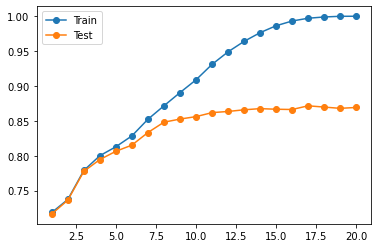

In [45]:
#Handy reference: https://machinelearningmastery.com/overfitting-machine-learning-models/

# evaluate decision tree performance on train and test sets with different tree depths and plot them!
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = RandomForestClassifier(max_depth=i)
 # fit model on the training dataset
 model.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [46]:
# Fit a model, and then print a classification report
clf = RandomForestClassifier(random_state=1,max_depth=5).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

                                                  precision    recall  f1-score   support

        Median House value greater than $400,000       0.89      0.35      0.50       650
Median House value between $250,000 and $400,000       0.62      0.37      0.46      1377
           Median House value less than $250,000       0.83      0.98      0.90      5125

                                        accuracy                           0.80      7152
                                       macro avg       0.78      0.57      0.62      7152
                                    weighted avg       0.79      0.80      0.78      7152

Training Score: 0.8138694375423537
Testing Score: 0.8048098434004475


In [47]:
# Fit a model, and then print a classification report
clf = RandomForestClassifier(random_state=1,max_depth=10).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

                                                  precision    recall  f1-score   support

        Median House value greater than $400,000       0.86      0.52      0.65       650
Median House value between $250,000 and $400,000       0.68      0.60      0.64      1377
           Median House value less than $250,000       0.90      0.97      0.93      5125

                                        accuracy                           0.86      7152
                                       macro avg       0.81      0.70      0.74      7152
                                    weighted avg       0.85      0.86      0.85      7152

Training Score: 0.9106994955199157
Testing Score: 0.8573825503355704


In [48]:
# Fit a model, and then print a classification report. scaled dataset. Default.
clf = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

                                                  precision    recall  f1-score   support

        Median House value greater than $400,000       0.13      0.94      0.23       650
Median House value between $250,000 and $400,000       0.03      0.01      0.02      1377
           Median House value less than $250,000       0.93      0.31      0.47      5125

                                        accuracy                           0.31      7152
                                       macro avg       0.36      0.42      0.24      7152
                                    weighted avg       0.68      0.31      0.36      7152

Training Score: 1.0
Testing Score: 0.8726230425055929


In [49]:
# Fit a model, and then print a classification report
clf = RandomForestClassifier(random_state=1,max_depth=10).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

                                                  precision    recall  f1-score   support

        Median House value greater than $400,000       0.14      0.94      0.24       650
Median House value between $250,000 and $400,000       0.05      0.02      0.03      1377
           Median House value less than $250,000       0.94      0.37      0.53      5125

                                        accuracy                           0.36      7152
                                       macro avg       0.37      0.44      0.27      7152
                                    weighted avg       0.70      0.36      0.41      7152

Training Score: 0.9108500865898652
Testing Score: 0.8572427293064877


In [50]:
# Fit a model, and then print a classification report. scaled dataset
clf = RandomForestClassifier(random_state=1,max_depth=5).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

                                                  precision    recall  f1-score   support

        Median House value greater than $400,000       0.13      0.95      0.23       650
Median House value between $250,000 and $400,000       0.02      0.01      0.01      1377
           Median House value less than $250,000       0.93      0.30      0.46      5125

                                        accuracy                           0.31      7152
                                       macro avg       0.36      0.42      0.23      7152
                                    weighted avg       0.68      0.31      0.35      7152

Training Score: 0.8138694375423537
Testing Score: 0.8048098434004475


In [51]:
# Import an Extremely Random Trees classifier
from sklearn.ensemble import ExtraTreesClassifier

In [52]:
clf = ExtraTreesClassifier(random_state=1,max_depth=5).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

                                                  precision    recall  f1-score   support

        Median House value greater than $400,000       0.99      0.15      0.25       650
Median House value between $250,000 and $400,000       0.18      0.00      0.00      1377
           Median House value less than $250,000       0.73      1.00      0.84      5125

                                        accuracy                           0.73      7152
                                       macro avg       0.63      0.38      0.37      7152
                                    weighted avg       0.65      0.73      0.63      7152

Training Score: 0.7308184624651758
Testing Score: 0.7302852348993288


## Feature Selection with Random Forests
Purpose: To find feature importance or coefficients of our model and remove the noise.

In [53]:
clf = RandomForestClassifier(random_state=1, max_depth=10).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9108500865898652
Testing Score: 0.8572427293064877


[1.14520638e-01 9.90740026e-02 5.42551901e-02 3.29505768e-02
 3.22425561e-01 1.10476641e-01 3.71502535e-02 1.26433177e-01
 1.21274310e-02 7.16137270e-02 1.98424299e-04 6.13408297e-03
 1.26402946e-02]


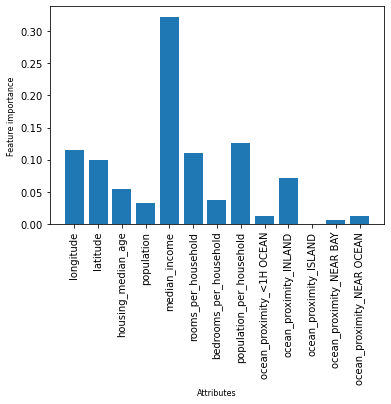

In [54]:
features = clf.feature_importances_
print(features)
x = np.arange(len(features))
plt.bar(x, height=features)
attributes=['longitude', 'latitude', 'housing_median_age', 'population', 'median_income',
       'rooms_per_household', 'bedrooms_per_household',
       'population_per_household', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']

plt.xticks(x, attributes, rotation=90)
plt.xlabel('Attributes', fontsize=8)
plt.ylabel('Feature importance', fontsize=8)
plt.show()

In [55]:
X_train_scaled.shape

(13281, 13)

In [56]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([ True,  True, False, False,  True,  True, False,  True, False,
       False, False, False, False])

In [57]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [58]:
clf = RandomForestClassifier(random_state=1,max_depth=10).fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9030931871574002
Testing Score: 0.8535917009199452


In [59]:
clf = RandomForestClassifier(random_state=1,max_depth=5).fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.8179979117723832
Testing Score: 0.816793893129771


In [60]:
clf = RandomForestClassifier(random_state=1).fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.8651399491094147


In [61]:
X_selected_train_scaled.shape

(15324, 5)

# Deploying PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_scaled = StandardScaler().fit_transform(X)


# Reducing components
pca = PCA(n_components = 0.80)

X_pca = pca.fit_transform(X_scaled)

In [ ]:
df_X_pca = pd.DataFrame(data=X_pca)
df_X_pca.head()

In [ ]:
df_X_pca = pd.DataFrame(
    data = X_pca, columns = ["principal component 1",
                             "principal component 2",
                             "principal component 3",
                             "principal component 4",
                             "principal component 5",
#                              "principal component 6"
                            ]
)

df_X_pca.head()

In [ ]:
# Training model
from sklearn.model_selection import train_test_split
X = df_X_pca

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [ ]:
sum(pca.explained_variance_ratio_)

In [ ]:
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)

# Train a Logistic Regression model print the model score
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [ ]:
# Fit a model, and then print a classification report
clf = RandomForestClassifier(random_state=1,max_depth=10).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

In [ ]:
# Fit a model, and then print a classification report
clf = RandomForestClassifier(random_state=1,max_depth=5).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

In [ ]:
# Fit a model, and then print a classification report
clf = RandomForestClassifier(random_state=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')